***
Supervised training with pairs of noisy and clean images
***

In [5]:
from unet import Unet
from n2v import N2VConfig, N2VDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
file_path=r'C:\Users\bioimaging1\Desktop\Deep learning image\actin\actin-60x-noise1-lowsnr.tif'
gt_path=r'C:\Users\bioimaging1\Desktop\Deep learning image\actin\actin-60x-noise1-highsnr.tif'
unet = Unet(n_depth=3, kernel_size=5)
config=N2VConfig([file_path],[gt_path],patch_shape=[1024,1024], patches_per_batch=2, validation_split=0.08)
n2v_data_generator=N2VDataGenerator(config)

In [7]:
history=unet.train(n2v_data_generator, epochs=40, supervised=True)

Epoch 1/40
184/184 [==============================] - 635s 3s/step - loss: 0.0051 - mae: 0.0305 - val_loss: 0.0089 - val_mae: 0.0503 - lr: 5.0000e-04
Epoch 2/40
184/184 [==============================] - 618s 3s/step - loss: 6.2916e-04 - mae: 0.0145 - val_loss: 0.0077 - val_mae: 0.0618 - lr: 5.0000e-04
Epoch 3/40
184/184 [==============================] - 614s 3s/step - loss: 5.3509e-04 - mae: 0.0134 - val_loss: 0.0052 - val_mae: 0.0478 - lr: 5.0000e-04
Epoch 4/40
184/184 [==============================] - 610s 3s/step - loss: 4.4575e-04 - mae: 0.0126 - val_loss: 0.0012 - val_mae: 0.0185 - lr: 5.0000e-04
Epoch 5/40
184/184 [==============================] - 614s 3s/step - loss: 4.1151e-04 - mae: 0.0120 - val_loss: 5.0579e-04 - val_mae: 0.0121 - lr: 5.0000e-04
Epoch 6/40
184/184 [==============================] - 611s 3s/step - loss: 4.2119e-04 - mae: 0.0123 - val_loss: 5.8573e-04 - val_mae: 0.0114 - lr: 5.0000e-04
Epoch 7/40
184/184 [==============================] - 619s 3s/step - los

In [10]:
result_supervised=unet.evaluate(n2v_data_generator, save_dir="restored_supervised")
ssim=np.array(result_supervised['ssim'])
psnr=np.array(result_supervised['psnr'])
old_ssim=np.array(result_supervised['old_ssim'])
old_psnr=np.array(result_supervised['old_psnr'])
print("For all the images".center(40,'-'))
print('duration:',result_supervised['duration'])
print('ssim:',ssim.mean().round(2),'\tpsnr:', psnr.mean().round(2))
print('old_ssim:', old_ssim.mean().round(2),'\told_psnr:', old_psnr.mean().round(2))

print("For the first image".center(40,'-'))
print('ssim:',ssim[0].round(2),'\tpsnr:', psnr[0].round(2))
print('old_ssim:', old_ssim[0].round(2),'\told_psnr:', old_psnr[0].round(2))

-----------For all the images-----------
duration: 0.6
ssim: 0.67 	psnr: 30.12
old_ssim: 0.32 	old_psnr: 25.96
----------For the first image-----------
ssim: [0.71] 	psnr: [27.89]
old_ssim: [0.33] 	old_psnr: [24.95]


In [12]:
#! the directory must exist
path="model_weights/supervised_ndepth3_kernelsize5.h5"
dirpath=os.path.dirname(path)
if not os.path.isdir(dirpath): os.makedirs(dirpath)
unet.model.save_weights(path)

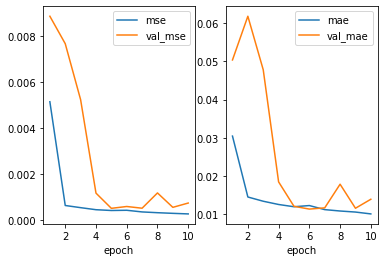

In [14]:
loss=history.history['loss']
val_loss=history.history['val_loss']
mae=history.history['mae']
val_mae=history.history['val_mae']

epochs=range(1,1+len(loss))
plt.subplot(121)
plt.plot(epochs,loss,label='mse')
plt.plot(epochs,val_loss,label='val_mse')
plt.xlabel("epoch");plt.legend()
plt.subplot(122)
plt.plot(epochs,mae,label='mae')
plt.plot(epochs,val_mae,label='val_mae')
plt.xlabel("epoch");plt.legend()
plt.show()

***
Self-supervised training with only noisy images
***

In [15]:
from unet import Unet
from n2v import N2VConfig, N2VDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [16]:
file_path=r'C:\Users\bioimaging1\Desktop\Deep learning image\actin\actin-60x-noise1-lowsnr.tif'
gt_path=r'C:\Users\bioimaging1\Desktop\Deep learning image\actin\actin-60x-noise1-highsnr.tif'
unet = Unet(n_depth=3, kernel_size=5)
config=N2VConfig([file_path],[gt_path],patch_shape=[256,256],patches_per_batch=32,validation_split=0.08)
n2v_data_generator=N2VDataGenerator(config)

In [17]:
history=unet.train(n2v_data_generator, epochs=40)

Epoch 1/40
184/184 [==============================] - 470s 3s/step - loss: 0.0074 - val_loss: 0.0050 - lr: 5.0000e-04
Epoch 2/40
184/184 [==============================] - 466s 3s/step - loss: 0.0022 - val_loss: 0.0041 - lr: 5.0000e-04
Epoch 3/40
184/184 [==============================] - 467s 3s/step - loss: 0.0016 - val_loss: 0.0023 - lr: 5.0000e-04
Epoch 4/40
184/184 [==============================] - 464s 3s/step - loss: 0.0013 - val_loss: 0.0022 - lr: 5.0000e-04
Epoch 5/40
184/184 [==============================] - 461s 3s/step - loss: 0.0014 - val_loss: 0.0011 - lr: 5.0000e-04
Epoch 6/40
184/184 [==============================] - 465s 3s/step - loss: 0.0012 - val_loss: 0.0024 - lr: 5.0000e-04
Epoch 7/40
184/184 [==============================] - 462s 3s/step - loss: 0.0011 - val_loss: 0.0014 - lr: 5.0000e-04
Epoch 8/40
184/184 [==============================] - 466s 3s/step - loss: 9.6836e-04 - val_loss: 0.0019 - lr: 3.5000e-04
Epoch 9/40
184/184 [==============================] 

In [18]:
result=unet.evaluate(n2v_data_generator, save_dir="restored_self_supervised")
ssim=np.array(result['ssim'])
psnr=np.array(result['psnr'])
old_ssim=np.array(result['old_ssim'])
old_psnr=np.array(result['old_psnr'])
print("For all the images".center(40,'-'))
print('duration:',result['duration'])
print('ssim:',ssim.mean().round(2),'\tpsnr:', psnr.mean().round(2))
print('old_ssim:', old_ssim.mean().round(2),'\told_psnr:', old_psnr.mean().round(2))

print("For the first image".center(40,'-'))
print('ssim:',ssim[0].round(2),'\tpsnr:', psnr[0].round(2))
print('old_ssim:', old_ssim[0].round(2),'\told_psnr:', old_psnr[0].round(2))

-----------EVALUATION BEGINS------------
100/100 images have been processed
-----------For all the images-----------
duration: 0.5
ssim: 0.36 	psnr: 23.52
old_ssim: 0.32 	old_psnr: 25.96
----------For the first image-----------
ssim: [0.42] 	psnr: [24.38]
old_ssim: [0.33] 	old_psnr: [24.95]


In [19]:
path="model_weights/self_supervised_ndepth3_kernelsize5.h5"
dirpath=os.path.dirname(path)
if not os.path.isdir(dirpath): os.makedirs(dirpath)
unet.model.save_weights(path)

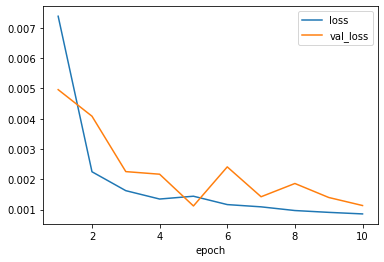

In [20]:
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,1+len(loss))
plt.plot(epochs,loss,label='loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.xlabel("epoch")
plt.legend()
plt.show()

***
Self-supervised training on one single image
***

In [21]:
from unet import Unet
from n2v import N2VConfig, N2VDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# file_path=r'C:\Users\bioimaging1\Desktop\Deep learning image\actin\actin-60x-noise1-lowsnr.tif'
# gt_path=r'C:\Users\bioimaging1\Desktop\Deep learning image\actin\actin-60x-noise1-highsnr.tif'
# with Image.open(file_path) as img,Image.open(gt_path) as gt:
#     img.save("singleimage.tif")
#     gt.save("singleimage_gt.tif")

In [22]:
file_path="singleimage.tif"
gt_path="singleimage_gt.tif"
unet = Unet(n_depth=3, kernel_size=5)
config=N2VConfig([file_path],[gt_path],patch_shape=[256,256],patches_per_batch=32,validation_split=0)
n2v_data_generator=N2VDataGenerator(config)

In [23]:
history=unet.train(n2v_data_generator, epochs=40*100)

Epoch 1/4000
2/2 [==============================] - 7s 3s/step - loss: 0.0570 - lr: 5.0000e-04
Epoch 2/4000
2/2 [==============================] - 5s 3s/step - loss: 0.0234 - lr: 5.0000e-04
Epoch 3/4000
2/2 [==============================] - 5s 3s/step - loss: 0.0186 - lr: 5.0000e-04
Epoch 4/4000
2/2 [==============================] - 5s 3s/step - loss: 0.0181 - lr: 5.0000e-04
Epoch 5/4000
2/2 [==============================] - 5s 3s/step - loss: 0.0180 - lr: 5.0000e-04
Epoch 6/4000
2/2 [==============================] - 5s 3s/step - loss: 0.0177 - lr: 5.0000e-04
Epoch 7/4000
2/2 [==============================] - 5s 2s/step - loss: 0.0178 - lr: 5.0000e-04
Epoch 8/4000
2/2 [==============================] - 5s 3s/step - loss: 0.0176 - lr: 5.0000e-04
Epoch 9/4000
2/2 [==============================] - 5s 3s/step - loss: 0.0175 - lr: 5.0000e-04
Epoch 10/4000
2/2 [==============================] - 5s 3s/step - loss: 0.0171 - lr: 5.0000e-04
Epoch 11/4000
2/2 [==============================

In [24]:
result_singleimage=unet.evaluate(n2v_data_generator, save_dir="restored_self_supervised_singleimage")
ssim=np.array(result_singleimage['ssim'])
psnr=np.array(result_singleimage['psnr'])
old_ssim=np.array(result_singleimage['old_ssim'])
old_psnr=np.array(result_singleimage['old_psnr'])
print("For the single image".center(40,'-'))
print('duration:',result['duration'])
print('ssim:',ssim.mean().round(2),'\tpsnr:', psnr.mean().round(2))
print('old_ssim:', old_ssim.mean().round(2),'\told_psnr:', old_psnr.mean().round(2))

-----------EVALUATION BEGINS------------
1/1 images have been processed
----------For the single image----------
duration: 0.5
ssim: 0.62 	psnr: 19.17
old_ssim: 0.33 	old_psnr: 24.95


c:\Projects\Haosheng\FluoMicro_Denoising\unet.py:342: UserWarning: restored_self_supervised_singleimage\singleimage_restored.tif is a low contrast image
  io.imsave(save_path, restored)


In [25]:
path="model_weights/self_supervised_ndepth3_kernelsize5_singleimage.h5"
dirpath=os.path.dirname(path)
if not os.path.isdir(dirpath): os.makedirs(dirpath)
unet.model.save_weights(path)

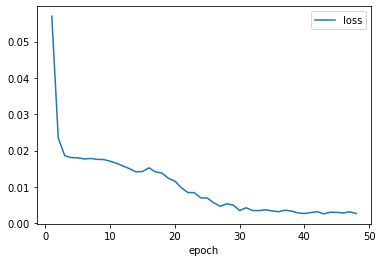

In [26]:
loss=history.history['loss']

epochs=range(1,1+len(loss))
plt.plot(epochs,loss,label='loss')
plt.xlabel("epoch")
plt.legend()
plt.show()


---

In [ ]:
config = N2VConfig(file_paths=["example.tif"],
                   ground_truth_paths=["example_gt.tif"],
                   patch_shape=(64, 64),
                   patches_per_batch=128,
                   data_augmentation=True,
                   epochs=100)
unet = Unet(config, n_depth=2)


In [ ]:
n2v_data_generator = N2VDataGenerator(config)
history=unet.train(n2v_data_generator)

In [ ]:
result=unet.evaluate(n2v_data_generator, divide=1, save_dir="restored_0")
ssim=np.array(result['ssim'])
psnr=np.array(result['psnr'])
old_ssim=np.array(result['old_ssim'])
old_psnr=np.array(result['old_psnr'])
print(result['duration'])
print('ssim:',ssim.mean().round(2),'\tpsnr:', psnr.mean().round(2))
print('old_ssim:', old_ssim.mean().round(2),'\told_psnr:', old_psnr.mean().round(2))

In [ ]:

from os.path import join
dataset_dir = r'C:\Users\bioimaging1\Desktop\Deep learning image\actin'
noisy_inputs = ["actin-20x-noise1-lowsnr.tif",
            # "actin-confocal-lowsnr.tif",
            # "actin-60x-noise1-lowsnr.tif",
            # "membrane-lowsnr.tif",
            # "mito-20x-noise1-lowsnr.tif",
            # "mito-60x-noise1-lowsnr.tif",
            # "mito-confocal-lowsnr.tif",
            # "nucleus-lowsnr.tif",
            # "mito-60x-noise2-lowsnr.tif"
            ]
ground_truth = ["actin-20x-noise1-highsnr.tif",
            # "actin-confocal-highsnr.tif",
            # "actin-60x-noise1-highsnr.tif",
            # "membrane-highsnr.tif",
            # "mito-20x-noise1-highsnr.tif",
            # "mito-60x-noise1-highsnr.tif",
            # "mito-confocal-highsnr.tif",
            # "nucleus-highsnr.tif",
            # "mito-60x-noise2-highsnr.tif"
            ] 
file_paths = [join(dataset_dir, dataset) for dataset in noisy_inputs]
ground_truth_paths = [join(dataset_dir, dataset) for dataset in ground_truth]
config = N2VConfig(file_paths, ground_truth_paths,
                   patch_shape=(128, 128),
                   validation_split=0.1,
                   patches_per_batch=32,
                   data_augmentation=True,
                   epochs=10)

n2v_data_generator = N2VDataGenerator(config)
unet = Unet(config, model_summary=False)

In [ ]:
config = N2VConfig(file_paths, ground_truth_paths,
                   patch_shape=(128, 128),
                   validation_split=0.1,
                   patches_per_batch=32,
                   data_augmentation=True,
                   epochs=20)

n2v_data_generator = N2VDataGenerator(config)
history = unet.train(n2v_data_generator, early_stopping_patience=5, reduce_lr_patience=2                                                                                )
# 可以在Tensorboard查看训练损失和验证损失的变化情况
# cmd: tensorboard --logdir tensorboard 

In [ ]:
# unet.model.load_weights("ckpt/best")
result=unet.evaluate(n2v_data_generator, divide=8, save_dir="restored_images_test1")


In [ ]:
unet.model.load_weights("ckpt/best")
result=unet.evaluate(n2v_data_generator, divide=1, save_dir=None)
ssim=np.array(result['ssim'])
psnr=np.array(result['psnr'])
old_ssim=np.array(result['old_ssim'])
old_psnr=np.array(result['old_psnr'])
print(result['duration'])
print('ssim:',ssim.mean(),'\tpsnr:', psnr.mean())
print('old_ssim:',old_ssim.mean(),'\told_psnr:', old_psnr.mean())

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(loss))
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel("epoch")
plt.legend()
